In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
feature = np.array([],dtype=int)
for i in range(2):
    for j in range(2):
        for m in range(2):
            for n in range(2):
                feature = np.append(feature,[i,j,m,n])

feature = np.reshape(feature,(16,4))

target = np.array([[s%2 for s in feature.sum(axis=1)]]).T

In [3]:
print(feature)
print()
print(target)

[[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 1 1]]

[[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]


In [4]:
class Dense:
    def __init__(self, n_output_nodes):
        self.n_output = n_output_nodes
    
    def build(self, n_input):
        self.weight = np.random.uniform(low=-1, high=1, size=(n_input + 1, self.n_output))
        self.output = np.zeros((1, self.n_output))
    
    def call(self, x):
        self.input = np.append(x,1)
        v = np.matmul(self.input, self.weight)
        self.output = 1 / (1 + np.exp(-v))
        
        return self.output

In [5]:
np.random.seed(2020)
layer = Dense(4)
layer.build(4)
layer.call(feature[1])

array([0.4767296 , 0.45863976, 0.25550647, 0.49327017])

In [6]:
class Multilayers:
    def __init__(self, x_shape, layers):
        self.model = layers
        self.n_layers = len(layers)
        
        n_input = x_shape
        for layer in self.model:
            layer.build(n_input)
            n_input = layer.n_output
            
    def predict(self, x):
        #self.outputs = dict()
        
        input_signal = x
        for i, layer in zip(range(self.n_layers), self.model):
            output_signal = layer.call(input_signal)
            #self.outputs[i] = output_signal
            input_signal = output_signal

        self.y = output_signal
        return self.y
    
    def __derivative(output):
        return output * (1 - output)
    
    def back_prop(self, target):
        learn_rate = 0.1
        
        i = 0
        for layer in reversed(self.model):
            #prime = self.__derivative(layer.output)
            prime = layer.output * (1 - layer.output)
            
            if i == 0:
                deltas = (target - self.y) * prime
            else:
                deltas = prime * np.inner(deltas, prev_weight[:-1])
            i+=1
            prev_weight = np.copy(layer.weight)
          
            layer.weight += learn_rate * np.outer(layer.input, deltas)
         

In [7]:
np.random.seed(2020)

model = Multilayers(4,[
    Dense(4),
    Dense(1)
])

model.predict(feature[0])


array([0.59519486])

In [8]:
def train(model, feature, target):
    epoch_size = len(feature)
    order = np.random.choice(range(epoch_size),size=epoch_size, replace=False)
    error = np.array([])
    for i in order:
        output = model.predict(feature[i])
        model.back_prop(target[i])
        error = np.append(error, target[i] - output)
    return np.absolute(error).max() #np.absolute(error).mean()

0 0.6396836067248847
50000 0.803046622011469
100000 0.8030894736770674
150000 0.8013806289889527
200000 0.8031217461389621
250000 0.8015444625980491
300000 0.8029000884775195
350000 0.8010682829264197
400000 0.8009383766797321
450000 0.8013898362005355
500000 0.8028818414782211
550000 0.8023764019795411
600000 0.8008349338797108
650000 0.8007150834402581
700000 0.8018910287992019
750000 0.7980096145517561
800000 0.06159380988483798
--- 1559.7690870761871 seconds ---
818617 0.04995852337589368


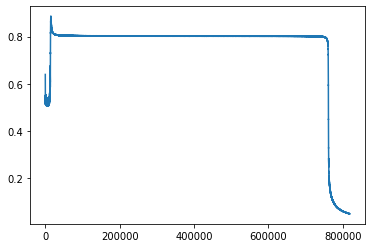

In [9]:
model = Multilayers(4,[
    Dense(4),
    Dense(1)
])

error = 1
history = []

start_time = time.time()
i=0
while error > 0.05 and i < 10000000:
    error = train(model, feature, target)
    history = np.append(history,error)

    if i % 50000 == 0:
        print(i, error)
        
    i += 1

print("--- %s seconds ---" % (time.time() - start_time))
print(i, error)

plt.plot(history)

In [10]:
np.absolute(np.array([int(model.predict(x)>0.5) for x in feature]) -  target.ravel()).mean()

0.0

In [11]:
np.array([int(model.predict(x)>0.5) for x in feature]) -  target.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
[model.predict(x) for x in feature]

[array([0.02549252]),
 array([0.97893124]),
 array([0.98982628]),
 array([0.02293314]),
 array([0.97893351]),
 array([0.02620054]),
 array([0.02293232]),
 array([0.97928957]),
 array([0.97892564]),
 array([0.02619203]),
 array([0.02292236]),
 array([0.97928197]),
 array([0.02619471]),
 array([0.94953614]),
 array([0.97928431]),
 array([0.02646095])]